In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
%config InlineBackend.figure_format = 'retina'

sns.set_theme(style='darkgrid', palette='rocket')

plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 8
plt.rcParams['savefig.format'] = 'pdf'

In [77]:
data = pd.read_parquet('train.parquet')
data.head()

,id,prompt,response_a,response_b,winner,model_a,model_b,language
0,00007cff95d7f7974642a785aca248b0f26e60d3312fac5f8151bea09a4f78b3,vieš po Slovensky?,"Áno, hovorím po slovensky. Ako vám môžem pomôcť?","Áno, veď som tu! Môžem ti pomôcť s otázkami alebo problémami, ktoré máš. Ako ti môžem pomôcť dnes?\n\n(Yes, I'm here! I can help you with questions or problems you have. How can I help you today?)",model_a,o1-preview,reka-core-20240904,Slovak
1,00010ed04b536f56ebe43eef1100c13906abea12bf98559b22d85d58f9250187,"You will be given a piece of news. Analyze it according to the following algorithm. First, determine the main event descibed in the text. News often contain references to previously reported facts. \n These references should be ignored. Second, determine whether any commercial or government organizations are discussed in the main topic. \n For all found organizations determine sentiment of the organization activities considering the possible effect of these activities on the organization itself. \n Ignore all organizations with neutral sentiment, I need only positive and negative sentiment. Ignore cases when organization provides analytics, I need only sentiment of activities. \n The output should be structured as a json with keys 'contains_orgs' (boolean) and 'orgs' (dictionary with original titles and sentiments. Do not translate titles).\n '''text''':\n В Белоруссии сообщили о пресечении деятельности резидентуры военной разведки Украины\n\nМосква. 20 октября. INTERFAX.RU - На территории Белоруссии пресекли деятельность резидентуры военной разведки Украины, заявил председатель КГБ республики Иван Тертель.\n\n""Задержаны резидент, гражданин Украины, а также двое наших граждан, которые вступили на путь предательства, работали в интересах иностранного государства. Кроме того, нами задержан бывший военнослужащий, подполковник. Фамилию сейчас называть не буду, он работал на Службу безопасности Украины"", - сказал Тертель перед встречей с коллективом ""Гродно Азот"" в четверг. Его цитирует госагентство БелТА.\n\n""Встречи проводились, в том числе в Одессе, других городах, на территории третьих государств. Большое количество граждан Украины, которые забрасывались на нашу территорию, нами задержаны в других регионах страны"", - заявил Тертель.\n\nПо информации председателя КГБ, гражданин Украины был переброшен в Белоруссию через Польшу, в одном из приграничных районов, создал агентурную сеть, которая собирала информацию закрытого характера о деятельности Вооруженных сил Белоруссии, иных силовых структурах.\n\n""Возбуждено уголовное дело за шпионаж, за измену государству, ведется следствие"", - сказал Тертель.\n\nПо его словам, в Белоруссии фиксируют активизацию украинской разведки.\n\n""Мы видим активизацию ведения агентурной разведки со стороны украинских иностранных спецслужб. Мы видим по информационной составляющей, что ситуация в регионе осложняется. И в этом не вина Республики Беларусь"", - сказал Тертель.\n\n""К сожалению, ситуация очень серьезно складывается на южном нашем направлении. Каждый день практически мы видим усиление разведывательной деятельности с украинской территории, ежедневно попытки нарушения воздушного пространства Республики Беларусь"", - отметил председатель КГБ.\n\nПо словам Тертеля, ежедневно фиксируется от 6 до 10 подобных фактов, все они пресекаются.\n\n\n Let's think step by step.","Let's break down the news and analyze it according to your instructions.\n\n**1. Main Event:**\n\nThe main event described in the text is the Belarusian KGB foiling the activities of a Ukrainian military intelligence residency operating within Belarus. This includes the arrest of the residency head (a Ukrainian citizen), two Belarusian citizens accused of treason, and a former Belarusian military officer who allegedly worked for the Ukrainian Security Service (SBU).\n\n**2. Organizations and Sentiment:**\n\n* **КГБ Республики Беларусь (KGB of the Republic of Belarus):** The KGB is portrayed as actively thwarting espiona

In [78]:
data.shape

(48439, 8)

In [79]:
data['winner'] = np.where(
    data['winner'] == 'model_a',
    data['model_a'],
    data['model_b']
)

In [80]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, random_state=4422)
train.drop(['id'], axis=1, inplace=True)
train.reset_index(drop=True, inplace=True)

# features examination

### language

In [81]:
train.head()

prompt  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    assuming a balanced diet, would eating a boiled egg every day be healthy or unhealthy   
1  As part of a report, two longlist solutions have been combined into a package to form a shortlist solution. These two longlist solutions are:\n6) Government Funding for Food Networks: Restore and increase government subsidies for food hubs and the New Zealand Food Network to support vulnerable groups.\n13) Misfit Donation to Food Hubs: Increase donations of misfit food to food hubs, creating incentives for farmers/processors to donate.\n\nWrite a summary of the package. Add detail as you see fit to better expand upon the longlist solutions. Use the following text as a guide and template:\n{The first shortlisted option combines option 6 (establishing mobile clinics), option 7 (teaching health literacy), and option 19

language distribution:

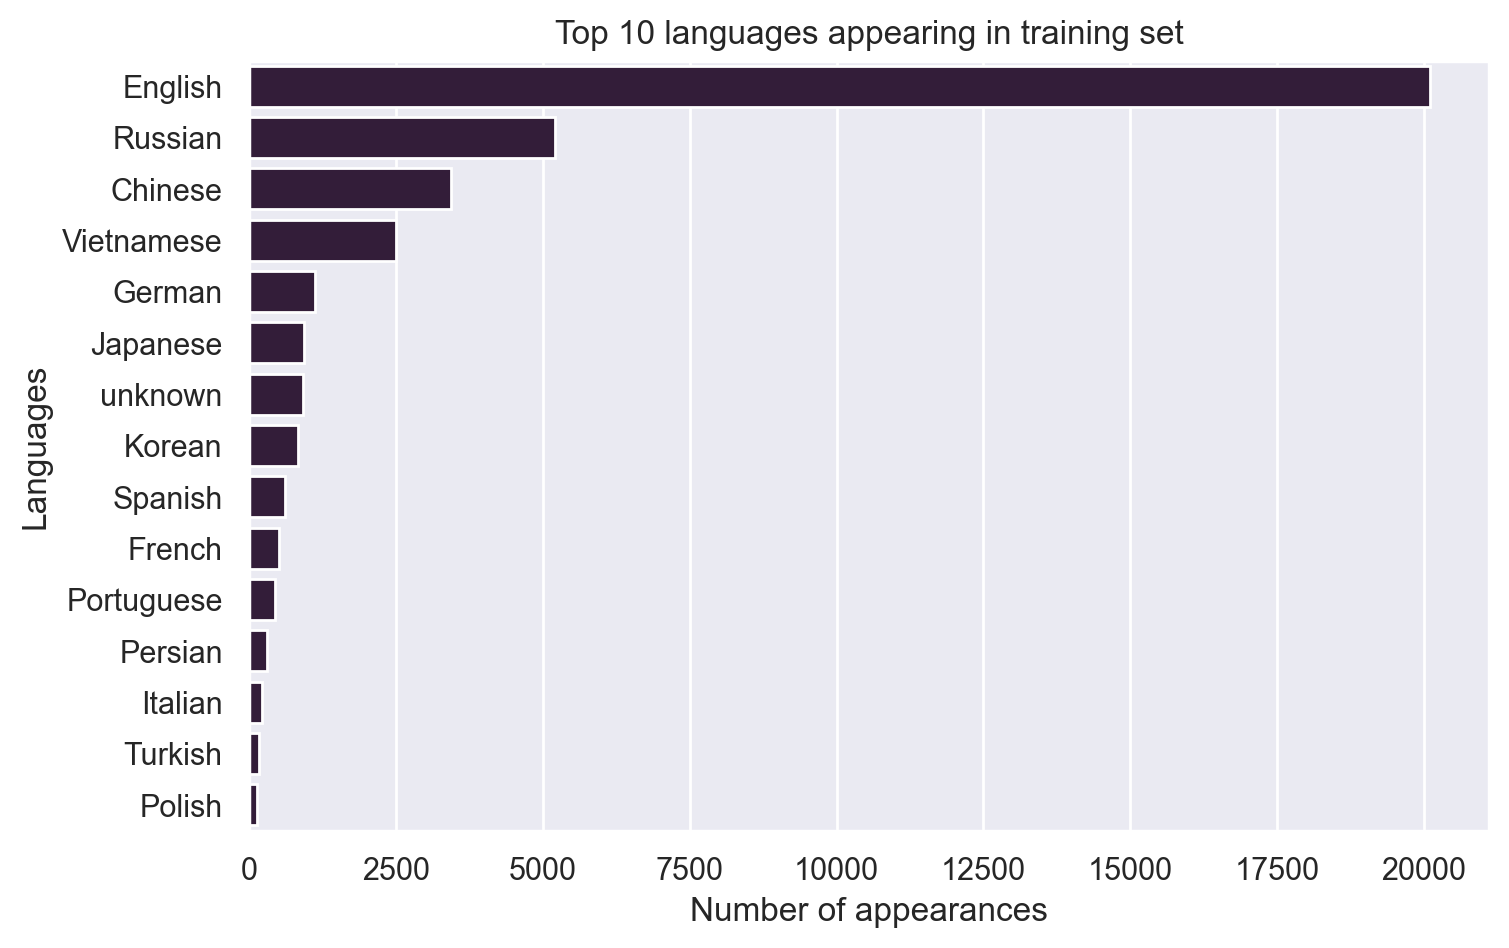

In [82]:
languages = train['language'].value_counts().to_frame()

plt.figure()
sns.barplot(languages.head(15), x='count', y='language')

plt.xlabel('Number of appearances')
plt.ylabel('Languages')
plt.title('Top 10 languages appearing in training set')
plt.show()

In [83]:
n = train.shape[0]
amount_unknown_lang = train[train['language'] == 'unknown'].shape[0]
print(f'Percentage of unknown language: {amount_unknown_lang / n * 100:.2f}%')

Percentage of unknown language: 2.36%


In [84]:
train['language'].nunique()

125

oh  
that means that it would be difficult to apply BoW-like methods.

### models

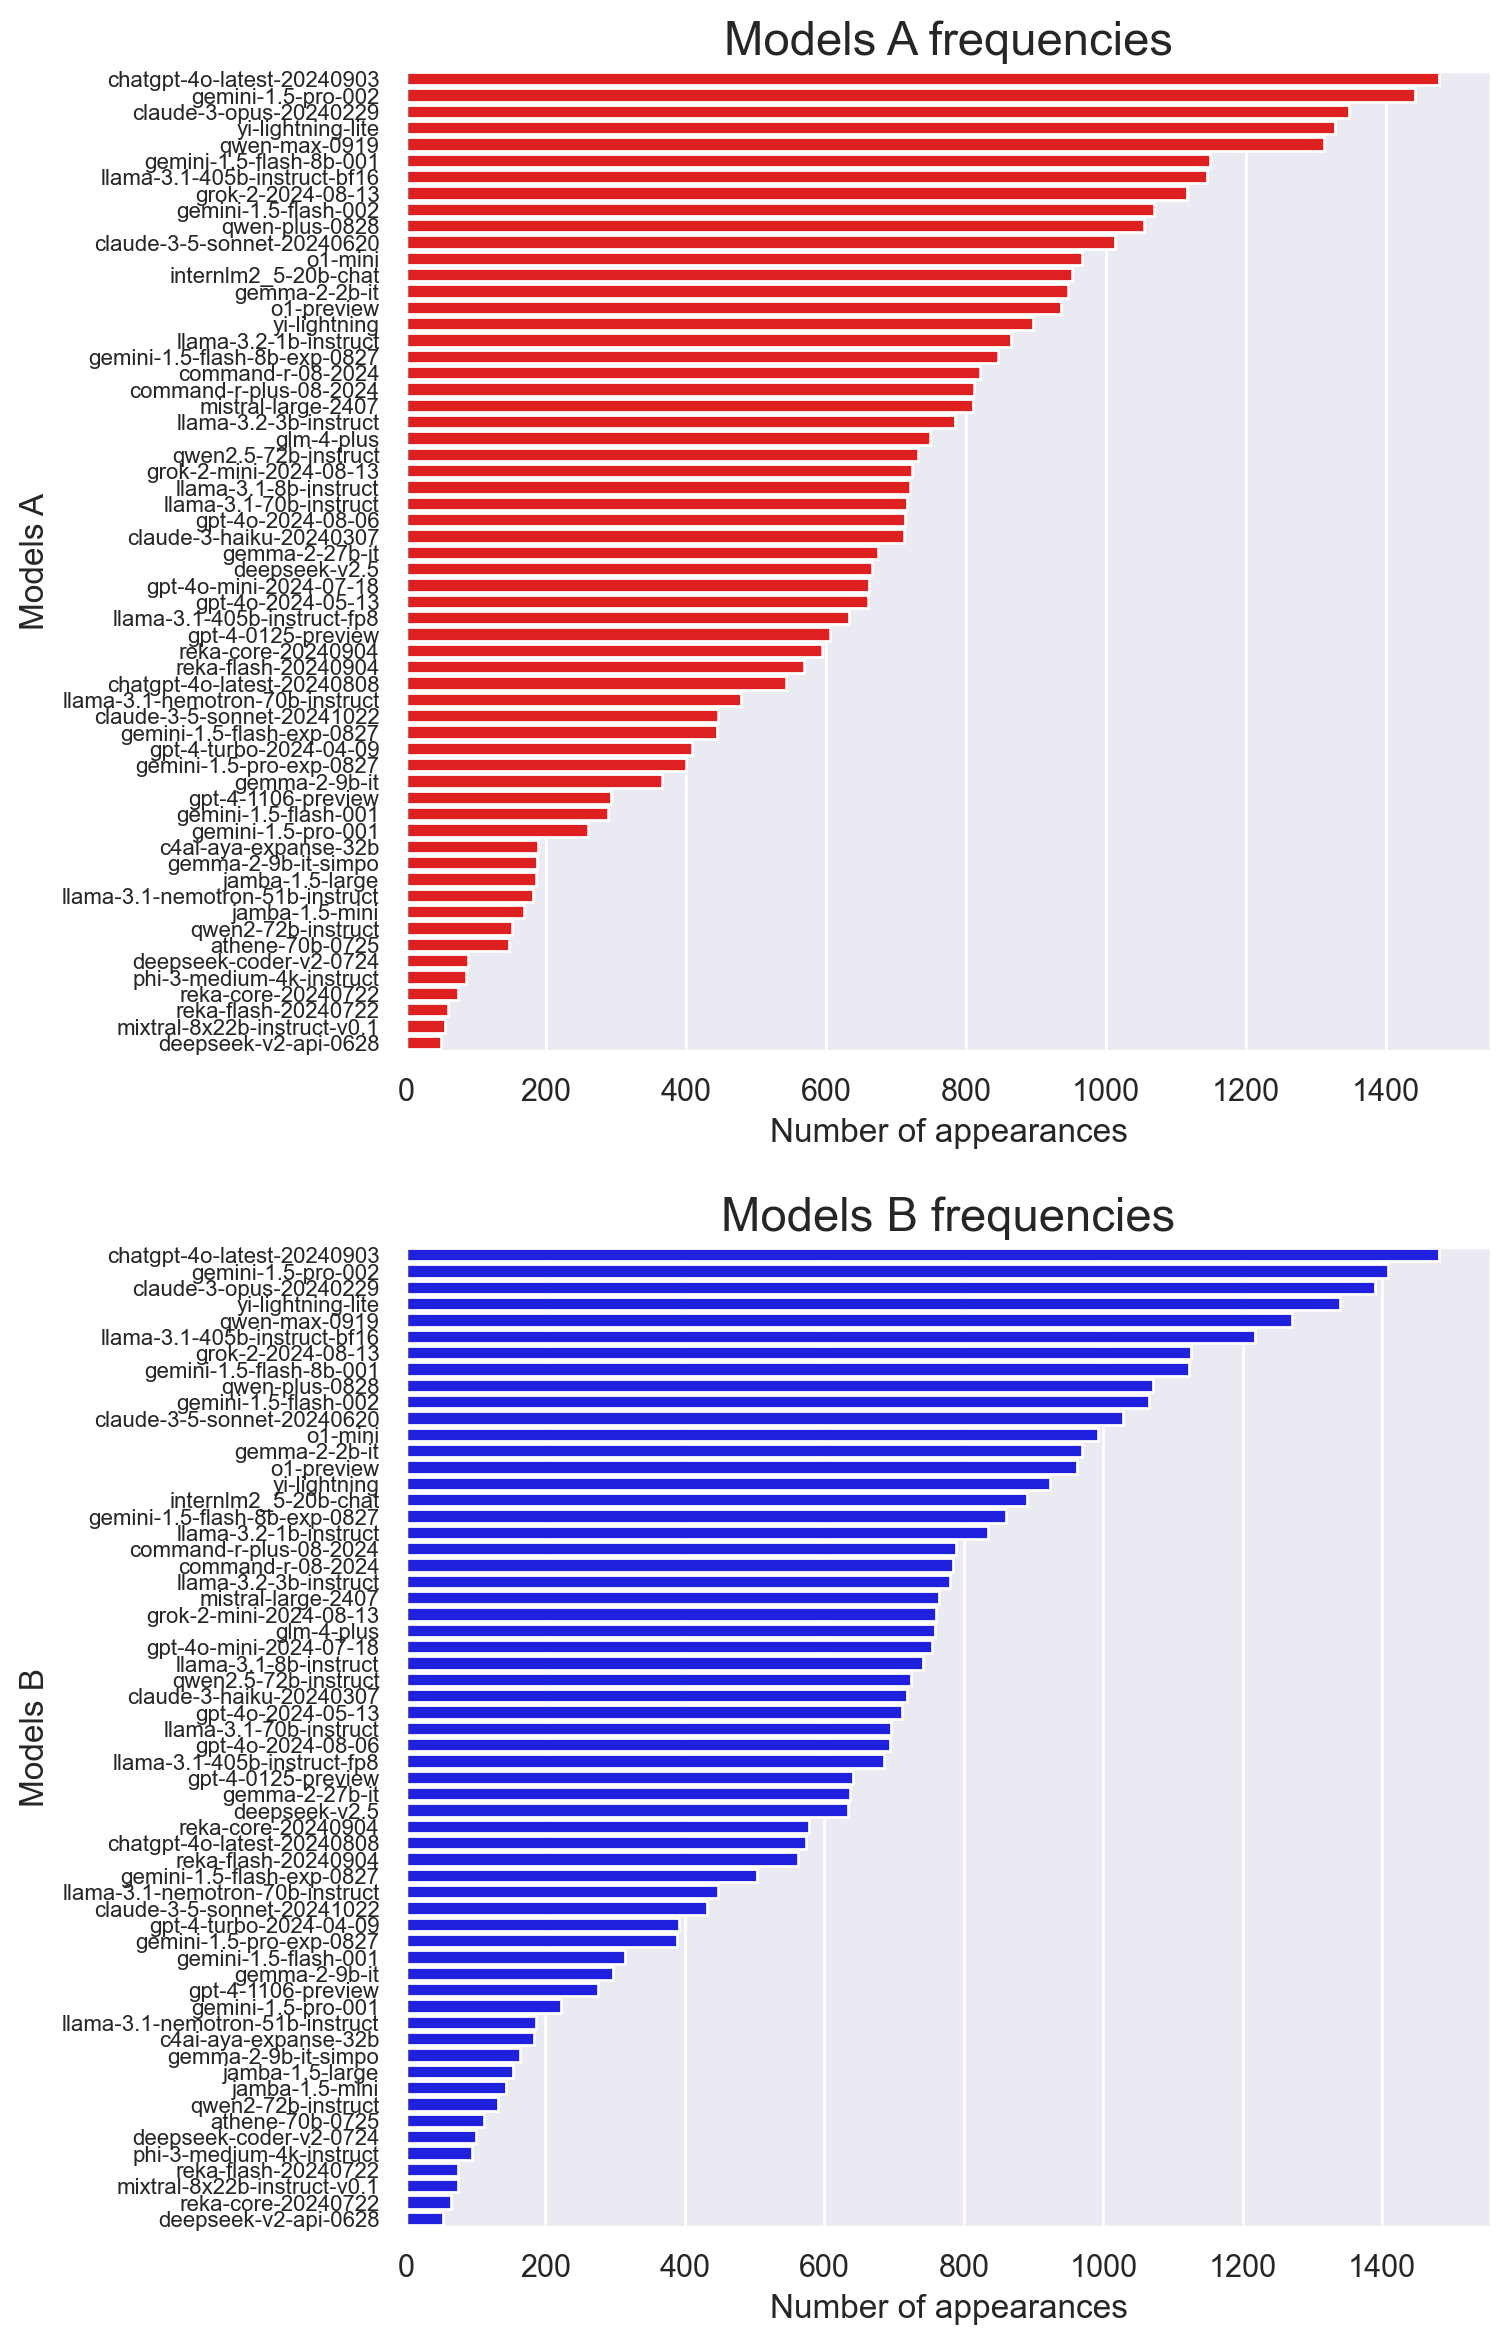

In [85]:
models_a = train['model_a'].value_counts()
models_b = train['model_b'].value_counts()

plt.figure(figsize=(7, 14))

plt.subplot(2, 1, 1)
sns.barplot(y=models_a.index, x=models_a.values, color='r')
plt.title('Models A frequencies', fontsize=17)
plt.xlabel('Number of appearances')
plt.ylabel('Models A')
plt.yticks(fontsize=8)

plt.subplot(2, 1, 2)
plt.title('Models B frequencies', fontsize=17)
sns.barplot(y=models_b.index, x=models_b.values, color='b')
plt.xlabel('Number of appearances')
plt.ylabel('Models B')
plt.yticks(fontsize=8)

plt.show()

### prompts & responses

In [86]:
assert train['prompt'].duplicated().astype(int).sum() > 0

train[train['prompt'].duplicated()].sort_values(by='prompt')

prompt  \
29858                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               \n\nAct as Nahida from Genshin Impact. Write a piece of wisdom that she would give.\n   
29968  \n\nWe are going to rewrite a document. We need to remove all overt fandom and references to My Little Pony, as well as rewriting language that is offensive. The document follows:\n\nOnce upon a time, in a high school built atop a reclaimed Florida landfill I had an idea. I was reading the Anne Rice Vampire Chronicles at the time, and was captivated by a scene wherein one of the vampires wrote as quickly as someone spoke. I wondered if it were possible, and the more I thought about it, the more I attempted to boost my own writing speed, the more the various failings of written English began to grate on me. I wanted a better way to write, so I set about trying to make one.\n\nI passed through many, many (many) iterations, and one of my earliest ideas was writing the vowels in a position system, in fact, it came to me outside the door to the typing class I took as a filler course my senior year. It turns out, that like all ideas, good or bad, somebody has had it before; who would have thought that even back then, Equestria was trying to make contact with me?\n\nMany years later, I discovered the existence of conlangs, and from thence, shorthand. Truly, it's criminal such a thing is no longer taught. Unlike cursive, shorthand is actually useful for note taking, as it's so much quicker than orthographic English. Oh well, gotta dumb folks down t

In [87]:
train['prompt_len'] = train['prompt'].apply(lambda s: len(s))
train['response_a_len'] = train['response_a'].apply(lambda s: len(s))
train['response_b_len'] = train['response_b'].apply(lambda s: len(s))

In [88]:
print('Amount of prompts with zero length:', train[train['prompt_len'] == 0].shape[0])
print('Amount of model A responses with zero length:', train[train['response_a_len'] == 0].shape[0])
print('Amount of model B responses with zero length:', train[train['response_b_len'] == 0].shape[0])

Amount of prompts with zero length: 0
Amount of model A responses with zero length: 0
Amount of model B responses with zero length: 0


In [89]:
print('0.5-quantile of prompt distribution:', np.quantile(train['prompt_len'], 0.5))
print('0.75-quantile of prompt distribution:', np.quantile(train['prompt_len'], 0.75))
print('0.9-quantile of prompt distribution:', np.quantile(train['prompt_len'], 0.9))

0.5-quantile of prompt distribution: 140.0
0.75-quantile of prompt distribution: 468.5
0.9-quantile of prompt distribution: 1842.0


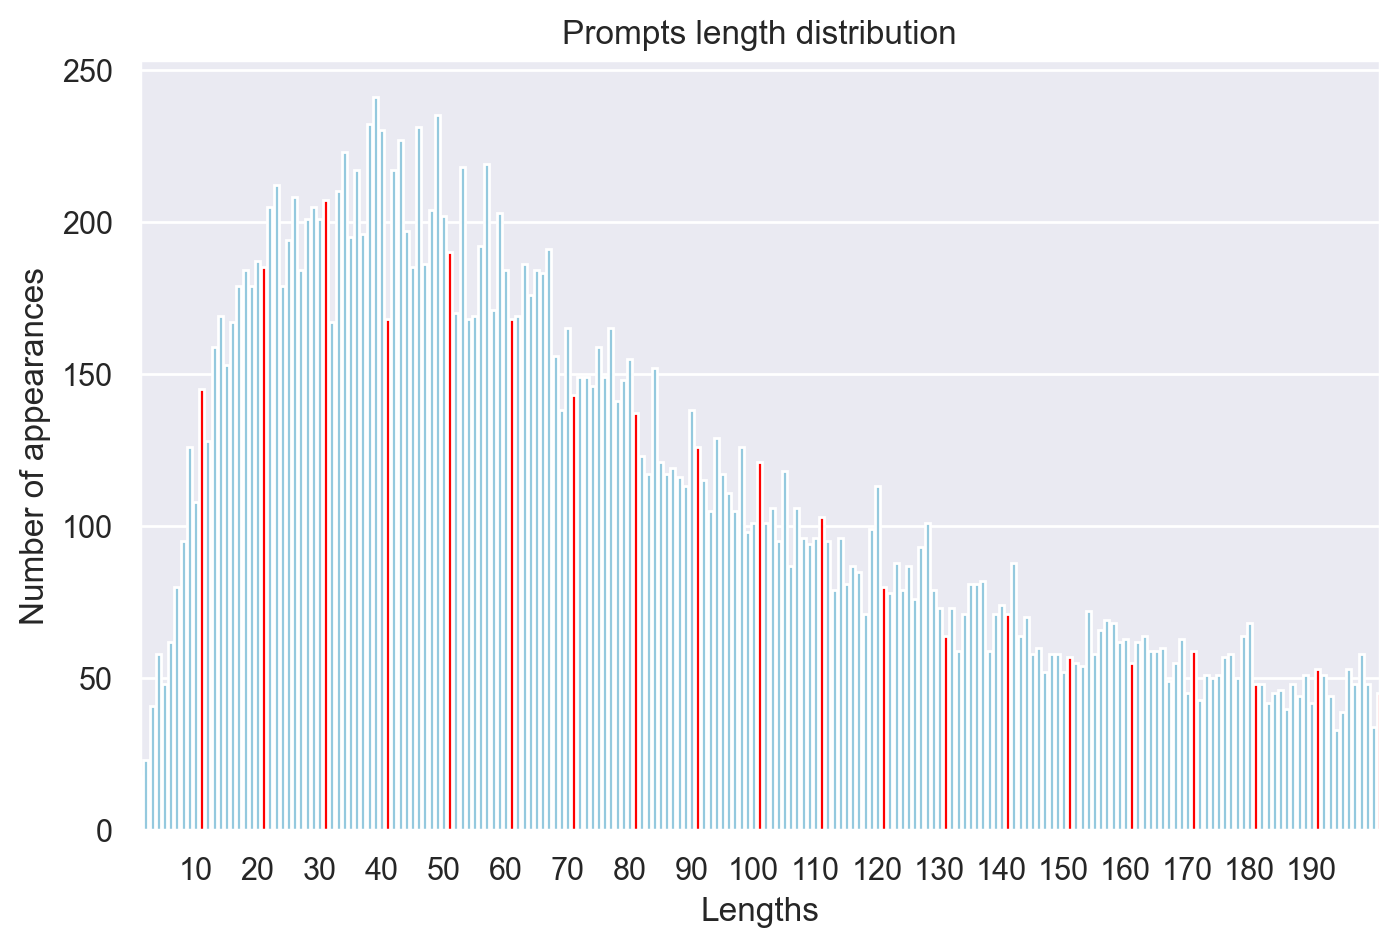

In [90]:
ax = sns.countplot(x='prompt_len', data=train, color='skyblue')
for i, bar in enumerate(ax.patches):
    if i % 10 == 0:
        bar.set_facecolor('red')

plt.title('Prompts length distribution')
plt.xlabel('Lengths')
plt.xticks(range(-1, 195, 10))
plt.xlim(0, 200)
plt.ylabel('Number of appearances')
plt.show()

In [91]:
train[train['prompt_len'] <= 10]

,prompt,response_a,response_b,winner,model_a,model_b,language,prompt_len,response_a_len,response_b_len
273,知識カットオフは,知識カットオフとは、**特定の時点までの知識や情報しか扱えない**という概念です。\n\n具体的には、以下の様な状況で使われます。\n\n* **AIの学習データの制限:** AIモデルは、学習データの範囲内で学習します。この学習データには、特定の時点までの情報しか含まれていない場合があります。\n* **最新情報の欠如:** AIモデルは、学習データに基づいて過去の情報を処理します。そのため、最新の出来事や情報にアクセスできない場合があります。\n* **特定の分野の専門知識:** AIモデルは、特定の分野の専門知識を学習することができます。しかし、その分野の最新情報や専門用語を理解しているとは限りません。\n\n知識カットオフは、AIモデルの能力を制限する可能性があります。しかし、同時に、AIモデルが過去の情報を処理する能力を活かせるというメリットもあります。\n\n例えば、歴史に関する質問に対して、AIモデルは過去の出来事に関する知識を元に回答することができます。しかし、最新の出来事や情報については回答できない可能性があります。\n\n知識カットオフは、AIモデルの開発や利用において重要な概念です。\n\n\n**より具体的な例:**\n\n* **ニュース記事のAI:** 2020年以前のニュース記事を扱うAIモデルは、2020年以降の出来事に関する情報を提供できない可能性があります。\n* **歴史に関するAI:** 1990年代の出来事に関するAIモデルは、2020年以降の出来事に関する情報を提供できない可能性があります。\n* **医療に関するAI:** 2020年以降の医療情報に関するAIモデルは、最新の医療技術や治療法に関する情報を提供できない可能性があります。\n\n\n知識カットオフは、AIモデルの能力を理解する上で重要な概念です。,私の知識は2023年11月までの情報に基づいています。その後に起こった出来事や、更新された情報については把握していませんので、ご了承ください。,chatgpt-4o-latest-20240903,gemma-2-2b-it,chatgpt-4o-latest-20240903,Japanese,8,768,71
335,내성발톱치료법,"내성발톱은 발톱이 살을 파고들어 염증과 통증을 유발하는 질환으로, 다양한 치료 방법이 있습니다. 내성발톱 치료법에는 다음과 같은 것들이 있습니다:\n\n1. 보존적 치료:\n - 발톱 주변의 염증과 통증을 완화하기 위해 항생제나 소염제를 복용합니다.\n - 발톱을 짧게 자르고, 발톱 주변의 살을 부드럽게 하여 발톱이 파고드는 것을 방지합니다.\n - 발가락을 따뜻한 물에 담가 발톱 주변의 부기를 줄이고, 발톱을 부드럽게 합니다.\n - 발가락에 패드를 대거나, 발가락을 고정하는 기구를 사용하여 발톱이 살을 파고드는 것을 방지합니다.\n\n2. 수술적 치료:\n - 심한 내성발톱의 경우, 수술적 치료가 필요할 수 있습니다.\n - 부분적 또는 전체적 발톱 제거: 발톱의 일부를 제거하거나, 전체 발톱을 제거하여 내성발톱을 치료합니다.\n - 발톱 교정술: 발톱의 모양을 교정하여 내성발톱을 예방하고 치료합니다.\n - 발톱 고정술: 발톱을 고정하여 내성발톱을 치료하고 재발을 방지합니다.\n\n3. 레이저 치료:\n - 레이저를 사용하여 발톱 주변의 조직을 제거하고, 발톱의 성장을 조절하여 내성발톱을 치료합니다.\n - 레이저 치료는 통증이 적고 회복 기간이 짧은 장점이 있습니다.\n\n4. 발 관리:\n - 발을 청결하고 건조하게 유지합니다.\n - 편안하고 잘 맞는 신발을 착용하여 발에 압박을 줄이고, 발톱이 살을 파고드는 것을 방지합니다.\n - 발톱을 너무 짧게 자르지 않고, 직선으로 자르는 것이 좋습니다.\n - 발가락 사이에 면봉이나 패드를 대어 발톱이 살을 파고드는 것을 방지합니다.\n\n5. 물리 치료:\n - 물리 치료를 통해 발가락의 근육과 인대를 강화하고, 발의 움직임을 개선하여 내성발톱을 예방하고 치료합니다.\n - 물리 치료사는 발가락의 위치를 교정하고, 발의 균형을 향상하는 운동을 지도합니다.\n\n내성발톱의 치료는 증상의 심각도와 원인에 따라 달라질 수 있습니다. 증상이 심하거나, 감염이 의심되는 경우, 전문의와 상담하여 적절한 치료법을 결정하는 것이 중요합니다. 또한, 내성발톱을 예방하기 위해 발 관리를 잘하고, 편안한 신발을 착용하는 것이 도움이 됩니다.","내성발톱(이빨발톱)은 발톱이 살에 파고들어 통증을 유발하는 상태를 말합니다. 내성발톱은 주로 발톱의 모양이 불규칙하거나 너무 두꺼워서 발생하며, 체중 증가, 발에 무리한 압력, 발톱 관리 부주의 등이 원인이 될 수 있습니다. 내성발톱의 치료법은 다음과 같습니다:\n\n### 1. **약물 치료**\n - **항염증제**: 통증과 염증을 줄이기 위해 항염증제를 사용할 수 있습니다.\n - **항생제**: 감염이 있는 경우 항생제를 사용할 수 있습니다.\n\n### 2. **발톱 관리**\n - **발톱 절삭**: 발톱을 정기적으로 절삭하고, 발톱의 모양을 정상적으로 유지하는 것이 중요합니다.\n - **발톱 파일**: 발톱을 부드럽게 파일하여 모서리를 둥글게 만들어 살에 파고들지 않도록 합니다.\n\n### 3. **발톱 보호대 사용**\n - **발톱 보호대**: 발톱 보호대를 사용하여 발톱이 살에 파고들지 않도록 보호할 수 있습니다.\n\n### 4. **수술 치료**\n - **발톱 절제술**: 발톱의 일부를 절제하여 통증을 줄이는 방법입니다.\n - **발톱 제거술**: 발톱 전체를 제거하는 방법으로, 완전히 치료하기 위해 사용될 수 있습니다.\n\n### 5. **물리 치료**\n - **냉찜질**: 통증과 염증을 줄이기 위해 냉찜질을 할 수 있습니다.\n - **치료용 발 운동**: 발의 근력을 강화하고 발톱의 모양을 정상화하기 위해 물리 치료를 받을 수 있습니다.\n\n### 6. **발 관리**\n - **적절한 신발 착용**: 발에 압력을 주지 않는 적절한 신발을 착용하는 것이 중요합니다.\n - **발 관리 제품**: 발톱 관리를 돕는 제품을 사용하여 발톱의 건강을 유지할 수 있습니다.\n\n### 7. **예방 조치**\n - **발톱 관리 습관**: 정기적으로 발톱을 관리하고, 발톱의 모양을 정상적으로 유지하는 습관을 들입니다.\n - **발 건강 유지**: 발의 건강을 유지하기 위해 적절한 신발을 착용하고, 발에 무리한 압력을 주지 않도록 합니다.\n\n내성발톱은 초기에 발견하여 치료하는 것이 중요합니다. 통증이 심하거나 감염 증상이 있는 경우 전문의의 진료를 받는 것이 좋습니다.",command-r-08-2024,command-r-08-2024,deepseek-v2.5,Korean,7,1071,1078
342,哈氣咪是什麼意思,「哈氣咪」是一個口語化的詞語，通常在粵語中使用，意思是「吹牛」、「誇大其詞」或「說大話」。這個詞語常用於描述一個人誇張地描述自己的成就、能力或經歷，以取悅或欺騙他人。\n\n例如，如果有人誇大自己的工作表現或成就，你可以說：「你又係度哈氣咪啦！」（你又在吹牛了！）或者「唔好再哈氣咪啦，講番啲真嘅啦！」（不要再誇大其詞了，說些真實的吧！）\n\n「哈氣咪」這個詞語帶有貶義，表示不贊同或不相信某人的誇張言論，提醒對方不要誇大其詞或說謊。,"""哈氣咪"" 是一個網絡用語，通常用於表達**可愛、撒嬌或賣萌**的意思。 \n\n它源於日語的「はあちゅうみ」（hāchūmi），是一種擬聲詞，用來模仿小動物或小孩子打哈欠時發出的聲音。\n\n在中文網絡語境中，""哈氣咪""被賦予了更豐富的感情色彩，常被用於：\n\n* **表達可愛:** 例如，看到可愛的寵物或小孩時，可能會說「好可愛，哈氣咪」。\n* **撒嬌賣萌:** 例如，在跟朋友聊天時，可以說「人家好累，哈氣咪」。\n* **表示慵懶或疲憊:** 例如，在感到疲憊時，可以說「哈氣咪，好想睡覺」。\n\n\n總之，""哈氣咪""是一個可愛且帶有親和力的網絡用語，可以用來表達各種可愛、撒嬌或賣萌的感情。",gemini-1.5-flash-exp-0827,command-r-plus-08-2024,gemini-1.5-flash-exp-0827,Chinese,8,214,297
349,ENTHELLAA,"It appears that the input is in all capital le

looks like we should take into account hieroglyphic languages. also separation by language groups (e.g. asian, slavic, latin) might help.

In [92]:
models_stats = train['winner'].value_counts().rename_axis('model').reset_index(name='wins').sort_values('model')
models_a = train['model_a'].value_counts().rename_axis('model').reset_index(name='appearance')
models_b = train['model_b'].value_counts().rename_axis('model').reset_index(name='appearance')

models = pd.merge(models_a, models_b, on='model')
models['appearance'] = models['appearance_x'] + models['appearance_y']
models_stats = pd.merge(models_stats, models, on='model').drop(['appearance_x', 'appearance_y'], axis=1)

models_stats['win_rate'] = models_stats['wins'] / models_stats['appearance']
models_stats.sort_values('win_rate', ascending=False, inplace=True)
models_stats.reset_index(drop=True, inplace=True)
models_stats.head(10)

,model,wins,appearance,win_rate
0,chatgpt-4o-latest-20240903,2144,2958,0.724814
1,o1-preview,1355,1898,0.713909
2,gemini-1.5-pro-exp-0827,533,789,0.675539
3,o1-mini,1305,1959,0.666156
4,chatgpt-4o-latest-20240808,727,1117,0.650850
5,grok-2-2024-08-13,1442,2242,0.643176
6,gemini-1.5-flash-exp-0827,577,947,0.609293
7,yi-lightning,1107,1818,0.608911
8,gemini-1.5-pro-002,1721,2849,0.604072
9,athene-70b-0725,156,259,0.602317


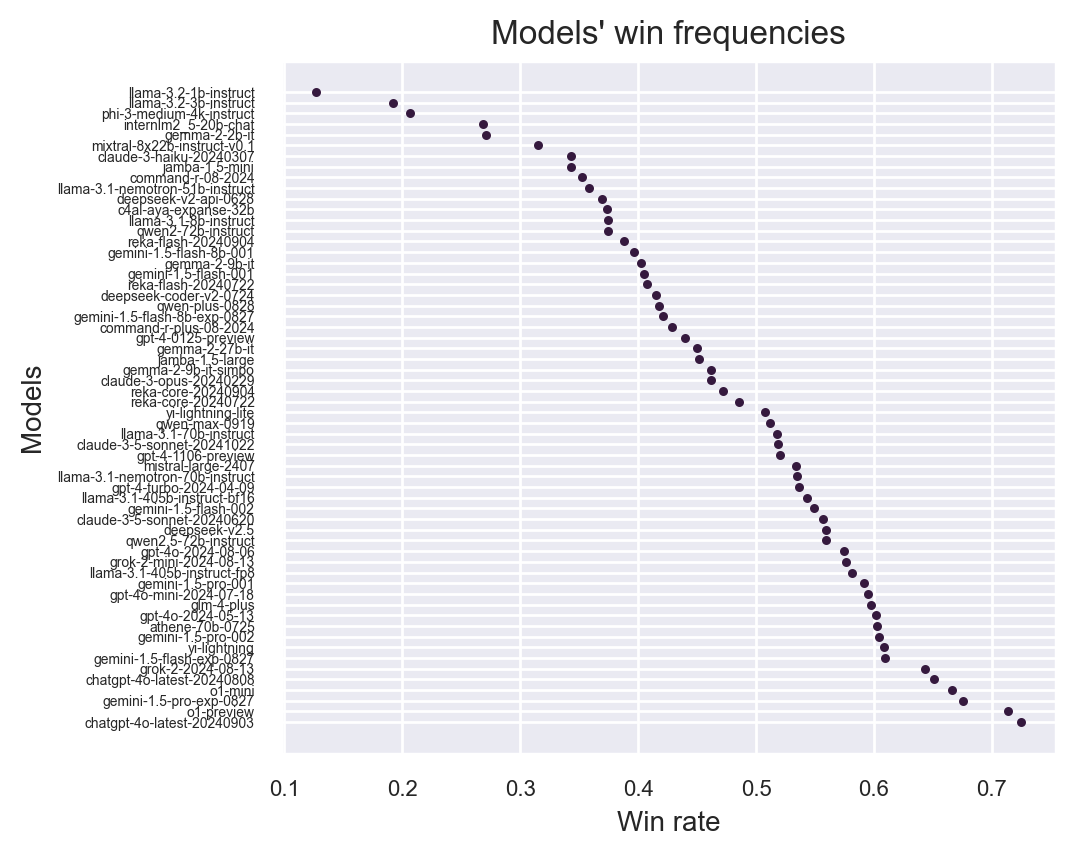

In [93]:
plt.figure(figsize=(5, 4.5))
plt.scatter(models_stats['win_rate'], models_stats['model'], s=5)

plt.title('Models\' win frequencies')
plt.xlabel('Win rate', fontsize=10)
plt.xticks(fontsize=8)
plt.ylabel('Models', fontsize=10)
plt.yticks(fontsize=5)

plt.show()

In [94]:
models_a = train[['model_a', 'response_a']].rename(columns={'model_a': 'model', 'response_a': 'response'})
models_b = train[['model_b', 'response_b']].rename(columns={'model_b': 'model', 'response_b': 'response'})

models = pd.concat([models_a, models_b])
models['response_len'] = models['response'].apply(lambda s: len(s))

models_stats_2 = (models[['model', 'response_len']]
                  .groupby('model')
                  .mean()
                  .rename(columns={'response_len': 'mean'})
                  .reset_index())
models_stats_2.head()

,model,mean
0,athene-70b-0725,1955.652510
1,c4ai-aya-expanse-32b,1748.209677
2,chatgpt-4o-latest-20240808,2099.746643
3,chatgpt-4o-latest-20240903,2575.187965
4,claude-3-5-sonnet-20240620,1366.079373


In [95]:
models_stats_3 = (models[['model', 'response_len']]
                  .groupby('model')
                  .median()
                  .rename(columns={'response_len': 'median'})
                  .reset_index())
models_stats_3.head()

,model,median
0,athene-70b-0725,1787.0
1,c4ai-aya-expanse-32b,1500.0
2,chatgpt-4o-latest-20240808,1486.0
3,chatgpt-4o-latest-20240903,1903.0
4,claude-3-5-sonnet-20240620,1087.0


In [96]:
models_stats = pd.merge(models_stats, models_stats_2, on='model')
models_stats = pd.merge(models_stats, models_stats_3, on='model')

models_stats.head()

,model,wins,appearance,win_rate,mean,median
0,chatgpt-4o-latest-20240903,2144,2958,0.724814,2575.187965,1903.0
1,o1-preview,1355,1898,0.713909,2569.771338,1668.0
2,gemini-1.5-pro-exp-0827,533,789,0.675539,1886.201521,1585.0
3,o1-mini,1305,1959,0.666156,2935.660541,2155.0
4,chatgpt-4o-latest-20240808,727,1117,0.650850,2099.746643,1486.0


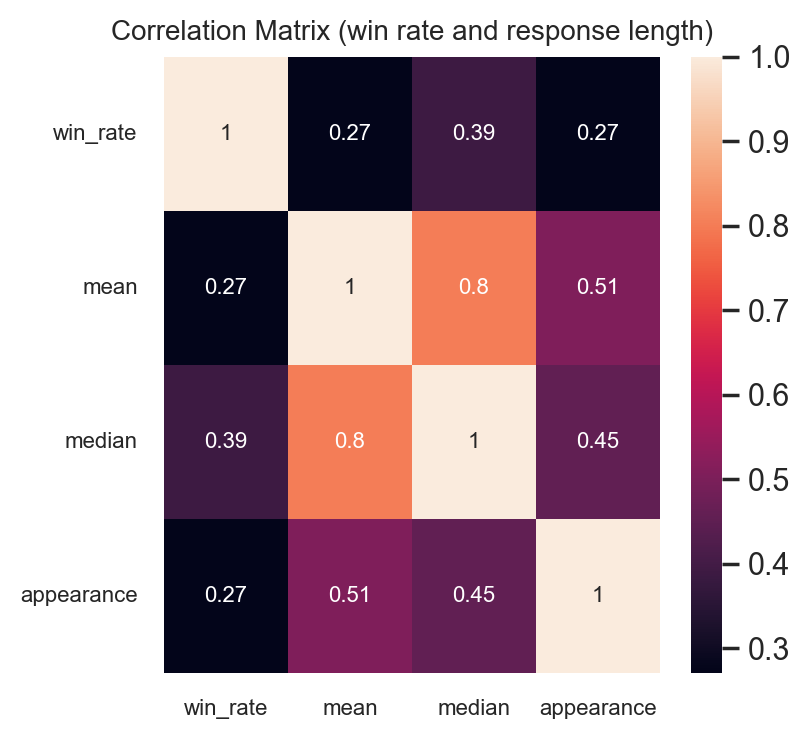

In [97]:
plt.figure(figsize=(4, 4))

correlation_matrix = models_stats[['win_rate', 'mean', 'median', 'appearance']].corr()
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix (win rate and response length)', fontsize=10)
plt.xticks(fontsize=8, rotation=0)
plt.yticks(fontsize=8, rotation=0)
plt.show()

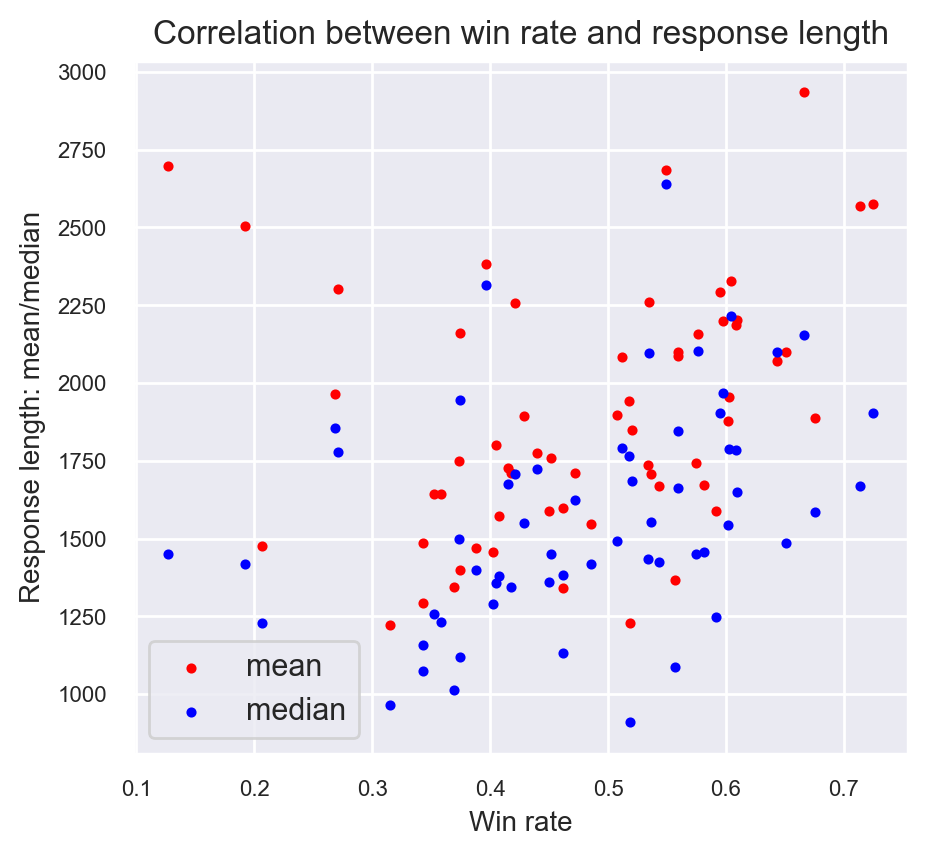

In [98]:
plt.figure(figsize=(5, 4.5))

plt.scatter(models_stats['win_rate'], models_stats['mean'], s=7, color='red', label='mean')
plt.scatter(models_stats['win_rate'], models_stats['median'], s=7, color='blue', label='median')

plt.title('Correlation between win rate and response length')
plt.xlabel('Win rate', fontsize=10)
plt.xticks(fontsize=8)
plt.ylabel('Response length: mean/median', fontsize=10)
plt.yticks(fontsize=8)
plt.legend()
plt.show()

# model 1: tf-idf + (tokenization?) + logreg

In [99]:
import os

path = "C:/Users/User/AppData/Roaming/nltk_data/corpora/stopwords"
available_languages = os.listdir(path)
available_languages.remove('README')

In [100]:
train['language_is_in_nltk'] = train['language'].apply(lambda x: x.lower()).isin(available_languages)
print('Percentage of languages in nltk:', train['language_is_in_nltk'].sum() / train.shape[0] * 100)

Percentage of languages in nltk: 83.64429305050193


In [101]:
from nltk.stem import SnowballStemmer
train['language'].apply(lambda x: x.lower()).isin(SnowballStemmer.languages).sum() / train.shape[0] * 100

np.float64(74.04454078604424)

In [102]:
from nltk.stem import SnowballStemmer
from sklearn.base import BaseEstimator, TransformerMixin

class TextPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self, method="lemmatization"):
        self.method = method  

    def preprocess_text(self, text, lang):
        try:
            stemmer = SnowballStemmer(lang[0].lower())
            words = [word.lower() for word in text[0].split()]
            words = [stemmer.stem(word) for word in words]
            return ' '.join(words)
        except:
            return text

    def fit(self, X, y=None):
        return self  

    def transform(self, X):
        return X.apply(lambda row: self.preprocess_text(row.iloc[0], row.iloc[1]), axis=1)

In [103]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

X_train, y_train = train.drop('winner', axis=1), train['winner']
X_test, y_test = test.drop('winner', axis=1), test['winner']

preprocessor = ColumnTransformer(
    transformers=[
        ('text_prep_prompt', Pipeline([
            ('preprocess', TextPreprocessor(method="stemming")),
            ('tfidf', TfidfVectorizer())
        ]), ['prompt', 'language']),
    
        ('text_prep_response_A', Pipeline([
            ('preprocess', TextPreprocessor(method="stemming")),
            ('tfidf', TfidfVectorizer())
        ]), ['response_a', 'language']),
    
        ('text_prep_response_B', Pipeline([
            ('preprocess', TextPreprocessor(method="stemming")),
            ('tfidf', TfidfVectorizer())
        ]), ['response_b', 'language']),
    ]
)

In [104]:
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LogisticRegression())
])

# pipeline.fit(X_train, y_train)

# y_pred = pipeline.predict(X_test)
# print(y_pred)

at this point we should accept the fact that using tf-idf with multiple languages and thousands of objects for 3 columns is kinda a bad idea.

# model 2. numeric features + logit?

In [105]:
train_2 = train.copy()

train_2.reset_index(inplace=True, drop=True)
train_2['win_rate_a'] = pd.merge(train_2, models_stats, left_on='model_a', right_on='model', how='left')['win_rate']
train_2['win_rate_b'] = pd.merge(train_2, models_stats, left_on='model_b', right_on='model', how='left')['win_rate']

train_2

prompt  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        assuming a balanced diet, would eating a boiled egg every day be healthy or unhealthy   
1      As part of a report, two longlist solutions have been combined into a package to form a shortlist solution. These two longlist solutions are:\n6) Government Funding for Food Networks: Restore and increase government subsidies for food hubs and the New Zealand Food Network to support vulnerable groups.\n13) Misfit Donation to Food Hubs: Increase donations of misfit food to food hubs, creating incentives for farmers/processors to donate.\n\nWrite a summary of the package. Add detail as you see fit to better expand upon the longlist solutions. Use the following text as a guide and template:\n{The first shortlisted option combines option 6 (establishing mobile clinics), option 7 (teaching health literacy), and o

In [106]:
pred = train_2.apply(lambda x: x['model_a'] if x['win_rate_a'] > x['win_rate_b'] else x['model_b'], axis=1)
pred.head()

0    llama-3.1-405b-instruct-bf16
1      chatgpt-4o-latest-20240903
2       gemini-1.5-flash-exp-0827
3      claude-3-5-sonnet-20240620
4              mistral-large-2407
dtype: object

In [107]:
from sklearn.metrics import accuracy_score

print(f"Train accuracy (plain): {accuracy_score(train_2['winner'], pred)}")

Train accuracy (plain): 0.6423060050063224


well well well. let's implement logreg

In [108]:
train_3 = train_2[['winner', 'prompt_len', 'response_a_len', 'response_b_len', 'win_rate_a', 'win_rate_b']].copy()
train_3['winner'] = (train_3['winner'] == train_2['model_a']).astype(int)

X_3 = train_3.drop('winner', axis=1)
y_3 = train_3['winner']

In [109]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_3, y_3)

pred = logreg.predict(X_3)
print(f"Train accuracy (logreg): {accuracy_score(y_3, pred):.4f}")

Train accuracy (logreg): 0.6453


now, on test data

In [110]:
test_3 = test.copy()
test_3.reset_index(inplace=True, drop=True)

test_3['prompt_len'] = test_3['prompt'].apply(lambda s: len(s))
test_3['response_a_len'] = test_3['response_a'].apply(lambda s: len(s))
test_3['response_b_len'] = test_3['response_b'].apply(lambda s: len(s))

test_3['win_rate_a'] = pd.merge(test_3, models_stats, left_on='model_a', right_on='model', how='left')['win_rate']
test_3['win_rate_b'] = pd.merge(test_3, models_stats, left_on='model_b', right_on='model', how='left')['win_rate']

#test_3['winner'] = (test_3['winner'] == test_3['model_a']).astype(int)
test_4 = test_3[['winner', 'prompt_len', 'response_a_len', 'response_b_len', 'win_rate_a', 'win_rate_b']].copy()

X_test_3 = test_4.drop('winner', axis=1)
y_test_3 = (test_3['winner'] == test_3['model_a']).astype(int)

In [111]:
pred = test_3.apply(lambda x: x['model_a'] if x['win_rate_a'] > x['win_rate_b'] else x['model_b'], axis=1)
print(f"Test accuracy (plain): {accuracy_score(test_3['winner'], pred):.4f}")

pred = logreg.predict(X_test_3)
print(f"Test accuracy (logreg): {accuracy_score(y_test_3, pred):.4f}")

Test accuracy (plain): 0.6363
Test accuracy (logreg): 0.6399


# model 3. Finetuning

this part was new to me as I've never used to finetune a model, so I had many problems like absence of GPU, limitations of Google Colab and issues related to libraries linking. despite it I came as much close to the resulting model as I could with my resources, only 30 hours of tuning stopped me, unfortunately

In [10]:
# !pip install datasets
# !pip install -U bitsandbytes

   ---------------------------------------- 0.0/68.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/68.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/68.5 MB ? eta -:--:--
   - -------------------------------------- 1.8/68.5 MB 5.6 MB/s eta 0:00:12
   - -------------------------------------- 2.4/68.5 MB 6.4 MB/s eta 0:00:11
   --- ------------------------------------ 5.8/68.5 MB 7.8 MB/s eta 0:00:09
   ---- ----------------------------------- 7.6/68.5 MB 8.5 MB/s eta 0:00:08
   ----- ---------------------------------- 10.0/68.5 MB 8.6 MB/s eta 0:00:07
   ------- -------------------------------- 12.3/68.5 MB 9.1 MB/s eta 0:00:07
   -------- ------------------------------- 14.7/68.5 MB 9.3 MB/s eta 0:00:06
   --------- ------------------------------ 16.5/68.5 MB 9.3 MB/s eta 0:00:06
   ---------- ----------------------------- 18.4/68.5 MB 9.5 MB/s eta 0:00:06
   ------------ --------------------------- 21.2/68.5 MB 9.7 MB/s eta 0:00:05
   -----------

In [1]:
import torch
from datasets import Dataset
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    EvalPrediction,
    Trainer,
    TrainingArguments,
    DataCollatorWithPadding,
)
from peft import LoraConfig, get_peft_model, TaskType
from sklearn.metrics import log_loss, accuracy_score

In [17]:
lora_config = LoraConfig(
    r=8,
    lora_alpha=16,
    target_modules=["query", "key", "value"],
    lora_dropout=0.05,
    bias="none",
    task_type=TaskType.SEQ_CLS,
)

In [18]:
checkpoint = "FacebookAI/xlm-roberta-base"
cache_directory = "D:/python3/transformers_cache"

tokenizer = AutoTokenizer.from_pretrained(checkpoint, cache_dir=cache_directory)
model = AutoModelForSequenceClassification.from_pretrained(
    checkpoint,
    num_labels=2,
    cache_dir=cache_directory
)

model = get_peft_model(model, lora_config)

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at FacebookAI/xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [19]:
class CustomTokenizer:
    def __init__(self, tokenizer):
        self.tokenizer = tokenizer

    def __call__(self, batch: dict) -> dict:
        prompt = ["User question: : " + self.process_text(t) for t in batch["prompt"]]
        response_a = ["\n\nAnswer A: " + self.process_text(t) for t in batch["response_a"]]
        response_b = ["\n\nAnswer B: " + self.process_text(t) for t in batch["response_b"]]
        texts = [p + r_a + r_b for p, r_a, r_b in zip(prompt, response_a, response_b)]
        tokenized = self.tokenizer(texts,
                                   padding="max_length",
                                   max_length=512,
                                   truncation=True
                                  )
        labels=[]
        for winner in batch["winner"]:
            if winner == "model_a":
                label = 0
            else:
                label = 1
            labels.append(label)
        return {**tokenized, "labels": labels}

    def process_text(self, text: str) -> str:
        if isinstance(text, str):
            return text.replace("null", "")
        return str(text)

In [20]:
from datasets import concatenate_datasets

data = Dataset.from_parquet("train.parquet")
data2 = Dataset.from_parquet("train.parquet")
data2 = (data2
           .rename_column("response_a", "temp")
           .rename_column("response_b", "response_a")
           .rename_column("temp", "response_b")
          )

data = concatenate_datasets([data, data2])

encode = CustomTokenizer(tokenizer)
data = data.map(encode, batched=True)

In [7]:
# data.save_to_disk("tokenized_data.parquet")

# import zipfile
# from datasets import load_from_disk

# with zipfile.ZipFile("dataset_info.zip", "r") as zip_ref:
#     zip_ref.extractall("tokenized_data")

# data = load_from_disk("tokenized_data")

In [6]:
def compute_metrics(eval_preds: EvalPrediction) -> dict:
    preds = eval_preds.predictions
    labels = eval_preds.label_ids
    probs = torch.from_numpy(preds).float().softmax(-1).numpy()
    loss = log_loss(y_true=labels, y_pred=probs)
    acc = accuracy_score(y_true=labels, y_pred=preds.argmax(-1))
    return {"acc": acc, "log_loss": loss}

In [21]:
selected_data = data.select_columns(['input_ids', 'attention_mask', 'labels'])
split_data = data.train_test_split(test_size=0.2, seed=42)

train_data = split_data['train']
test_data = split_data['test']

In [22]:
training_args = TrainingArguments(
    output_dir="output",
    overwrite_output_dir=True,
    report_to="none",
    num_train_epochs=1,
    per_device_train_batch_size=8,
    gradient_accumulation_steps=8,
    per_device_eval_batch_size=8,
    logging_steps=10,
    eval_strategy="epoch",
    save_strategy="steps",
    save_steps=200,
    optim="adamw_hf",
    fp16=True,
    learning_rate=2e-5,
    warmup_steps=20,
    no_cuda=True,
)

trainer = Trainer(
    args=training_args,
    model=model,
    tokenizer=tokenizer,
    train_dataset=train_data,
    eval_dataset=test_data,
    compute_metrics=compute_metrics,
    data_collator=DataCollatorWithPadding(tokenizer=tokenizer),
)

trainer.train()

C:\Users\User\AppData\Local\Temp\ipykernel_9004\3246018249.py:20: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss


KeyboardInterrupt: 

I guess this is not a bad ending, because now I know a lot more about finetuning, quantization and EDA. maybe next time I will be more lucky to use it ^^